In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import folium

## 데이터 요약하기
info, shape, nunique, head, sample

In [2]:
df = pd.read_csv('data/한국전력공사_서울시 전기차 충전소 충전량_20220331.csv')

In [3]:
df

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04
...,...,...,...,...,...,...,...,...,...
638697,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,41.67,1,21,2022-03-31 09:44:33,2022-03-31 11:05:57
638698,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,29.07,0,44,2022-03-31 12:17:56,2022-03-31 13:02:54
638699,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,55.65,1,21,2022-03-31 16:57:11,2022-03-31 18:19:04
638700,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,21.48,1,3,2022-03-31 13:06:18,2022-03-31 14:09:20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638702 entries, 0 to 638701
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   충전구분    638702 non-null  object 
 1   충전소명    638702 non-null  object 
 2   주소      638702 non-null  object 
 3   충전기용량   631208 non-null  float64
 4   충전량     638702 non-null  float64
 5   충전시간    638702 non-null  int64  
 6   충전분     638702 non-null  int64  
 7   충전시작시각  638702 non-null  object 
 8   충전종료시각  638702 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 43.9+ MB


In [5]:
df.shape

(638702, 9)

In [6]:
df.nunique()

충전구분           2
충전소명         625
주소           611
충전기용량          3
충전량         9563
충전시간         127
충전분           60
충전시작시각    631123
충전종료시각    621088
dtype: int64

## 데이터 전처리
- 결측값 처리
- 중복값 확인 및 제거
- 데이터 형식 바꾸기
- 필요없는 컬럼 삭제
- downcast

In [7]:
df.isnull().sum()

충전구분         0
충전소명         0
주소           0
충전기용량     7494
충전량          0
충전시간         0
충전분          0
충전시작시각       0
충전종료시각       0
dtype: int64

In [8]:
df[df.duplicated()]

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각


In [9]:
df['충전시작시각'] = pd.to_datetime(df['충전시작시각'])

In [10]:
df['충전종료시각'] = pd.to_datetime(df['충전종료시각'])

In [11]:
df = df.drop(columns = '충전기용량')

In [12]:
for col in df.columns:
    if df[col].dtype.name.startswith('float') : 
        df[col] = pd.to_numeric(df[col], downcast = 'float')
    elif df[col].dtype.name.startswith('int') :
        if (df[col].min() >= 0) : 
            df[col] = pd.to_numeric(df[col], downcast = 'unsigned')
        else : 
            df[col] = pd.to_numeric(df[col], downcast = 'signed')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638702 entries, 0 to 638701
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   충전구분    638702 non-null  object        
 1   충전소명    638702 non-null  object        
 2   주소      638702 non-null  object        
 3   충전량     638702 non-null  float32       
 4   충전시간    638702 non-null  uint32        
 5   충전분     638702 non-null  uint8         
 6   충전시작시각  638702 non-null  datetime64[ns]
 7   충전종료시각  638702 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float32(1), object(3), uint32(1), uint8(1)
memory usage: 29.8+ MB


## 이상치 처리
- 주소가 서울시가 아닌 데이터 삭제
- 주소에 오류가 있는 데이터 삭제
- 충전시작시각과 충전 종료시각 사이가 14시간 이상인 데이터 삭제(전기차 완속충전기 14시간 이상 점유시 과태료 10만원)

In [14]:
# 서울특별시 데이터만 남기기
df = df[df['주소'].str.startswith('서울특별시')]

In [15]:
df = df[~((df['충전종료시각'] - df['충전시작시각']) >= '0 days 14:00:00')]

In [16]:
# 주소에 오류가 있는 데이터 삭제 -> 가끔 주소가 서울특별시 null null null null인 데이터 존재
df = df[~df['주소'].str.contains('null')]

## 파생변수 만들기
- 자치구 이름 및 자치구 코드
- 급속충전기 및 완속충전기 개수
- 위도 및 경도
- 요일
- 총 충전시간
- 날짜가 바뀌는 데이터 나누어주기
- 시간대 더미변수 만들기

In [17]:
df['자치구'] = df['주소'].str.split(expand = True)[1]
df['자치구']

0         영등포구
1         영등포구
2         영등포구
3         영등포구
4         영등포구
          ... 
638697      중구
638698      중구
638699      중구
638700      중구
638701      중구
Name: 자치구, Length: 621120, dtype: object

In [18]:
seoul = '''1100000000 인근지역
 
1111000000 종로구
 
1114000000 중구
 
1117000000 용산구
 
1120000000 성동구
 
1121500000 광진구
 
1123000000 동대문구
 
1126000000 중랑구
 
1129000000 성북구
 
1130500000 강북구
 
1132000000 도봉구
 
1135000000 노원구
 
1138000000 은평구
 
1141000000 서대문구
 
1144000000 마포구
 
1147000000 양천구
 
1150000000 강서구
 
1153000000 구로구
 
1154500000 금천구
 
1156000000 영등포구
 
1159000000 동작구
 
1162000000 관악구
 
1165000000 서초구
 
1168000000 강남구
 
1171000000 송파구
 
1174000000 강동구'''

In [19]:
seoul_list = seoul.split("\n \n")
seoul_code = {n.split(" ")[1] : int(n.split(" ")[0][:5]) for n in seoul_list}
seoul_code

df["자치구코드"] = df["자치구"].map(seoul_code)
df["자치구코드"] = pd.to_numeric(df["자치구코드"], downcast='integer')
df['자치구코드']

0         11560
1         11560
2         11560
3         11560
4         11560
          ...  
638697    11140
638698    11140
638699    11140
638700    11140
638701    11140
Name: 자치구코드, Length: 621120, dtype: int16

In [20]:
df_2 = pd.read_excel('data/전기차 충전소 설치현황_20221020.xls')
df_2.columns = df_2.iloc[1]
df_2 = df_2.drop([0,1])
df_2 = df_2.rename(columns = {'설치장소' : '충전소명'})

df = df.merge(df_2[['충전소명','급속충전기(대)','완속충전기(대)']], on="충전소명", how="left")

In [21]:
df_3 = pd.read_csv('data/한국전력공사_전기차충전소위경도_20220718.csv')
df_3 = df_3.drop(columns = '시도')

In [22]:
df = pd.merge(df, df_3, on = '충전소명')

In [23]:
df['위도'], df['경도'] = df['경도'], df['위도']

In [24]:
df['요일'] = df['충전시작시각'].dt.dayofweek.map(lambda x : "월화수목금토일"[x])
df['요일']

0         금
1         토
2         토
3         월
4         월
         ..
621176    목
621177    목
621178    목
621179    목
621180    목
Name: 요일, Length: 621181, dtype: object

In [25]:
# "충전분" 시간 단위로 변환
df["총충전시간"] = df["충전시간"]+(df["충전분"]/60)

# 소수점 아래 두 자리까지 남기기
df["총충전시간"] = round(df["총충전시간"],2)

# 기존 컬럼 삭제
df = df.drop(columns=['충전시간','충전분'])

In [26]:
# 날짜가 바뀌는 데이터 쪼개어주기

df['날짜바뀜'] = df['충전시작시각'].dt.day != df['충전종료시각'].dt.day
day_over = df[df['날짜바뀜'] == True].copy()

day_over['자정'] = (day_over['충전종료시각'].dt.date.astype(str) + ' '+ "00:00:00")
day_over['자정'] = pd.to_datetime(day_over['자정'])
day_over['충전시작시각'] = day_over['자정']

df.loc[df['날짜바뀜'] == True ,'충전종료시각'] = df['충전시작시각'].dt.date.astype(str) + " 23:59:59"
df['충전종료시각'] = pd.to_datetime(df['충전종료시각'])

In [27]:
df = pd.concat([df,day_over], ignore_index = True)
df = df.drop(columns = ['날짜바뀜','자정'])

In [28]:
df.isnull().sum()

충전구분           0
충전소명           0
주소             0
충전량            0
충전시작시각         0
충전종료시각         0
자치구            0
자치구코드          0
급속충전기(대)    2219
완속충전기(대)    2219
경도             0
위도             0
요일             0
총충전시간          0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715151 entries, 0 to 717369
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   충전구분      715151 non-null  object        
 1   충전소명      715151 non-null  object        
 2   주소        715151 non-null  object        
 3   충전량       715151 non-null  float32       
 4   충전시작시각    715151 non-null  datetime64[ns]
 5   충전종료시각    715151 non-null  datetime64[ns]
 6   자치구       715151 non-null  object        
 7   자치구코드     715151 non-null  int16         
 8   급속충전기(대)  715151 non-null  object        
 9   완속충전기(대)  715151 non-null  object        
 10  경도        715151 non-null  float64       
 11  위도        715151 non-null  float64       
 12  요일        715151 non-null  object        
 13  총충전시간     715151 non-null  float64       
dtypes: datetime64[ns](2), float32(1), float64(3), int16(1), object(7)
memory usage: 75.0+ MB


In [31]:
df['급속충전기(대)'] = pd.to_numeric(df['급속충전기(대)'], downcast = 'unsigned')
df['완속충전기(대)'] = pd.to_numeric(df['완속충전기(대)'], downcast = 'unsigned')
df['경도'] = pd.to_numeric(df['경도'], downcast = 'float')
df['위도'] = pd.to_numeric(df['위도'], downcast = 'float')
df['총충전시간'] = pd.to_numeric(df['총충전시간'], downcast = 'float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715151 entries, 0 to 717369
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   충전구분      715151 non-null  object        
 1   충전소명      715151 non-null  object        
 2   주소        715151 non-null  object        
 3   충전량       715151 non-null  float32       
 4   충전시작시각    715151 non-null  datetime64[ns]
 5   충전종료시각    715151 non-null  datetime64[ns]
 6   자치구       715151 non-null  object        
 7   자치구코드     715151 non-null  int16         
 8   급속충전기(대)  715151 non-null  uint8         
 9   완속충전기(대)  715151 non-null  uint8         
 10  경도        715151 non-null  float32       
 11  위도        715151 non-null  float32       
 12  요일        715151 non-null  object        
 13  총충전시간     715151 non-null  float32       
dtypes: datetime64[ns](2), float32(4), int16(1), object(5), uint8(2)
memory usage: 57.3+ MB


In [33]:
df['시간대벡터'] = df['충전시작시각'].dt.hour.astype(str) + ',' + df['충전종료시각'].dt.hour.astype(str)
df['시간대벡터'] = df['시간대벡터'].map(lambda x : (int(x.split(',')[0]), int(x.split(',')[1]) + 1))
df['시간대벡터']

0           (2, 3)
1         (14, 16)
2         (20, 23)
3         (12, 13)
4         (22, 24)
            ...   
717365      (0, 4)
717366      (0, 9)
717367      (0, 1)
717368      (0, 4)
717369      (0, 1)
Name: 시간대벡터, Length: 715151, dtype: object

In [34]:
for n in range(24):
    df[n] = df['시간대벡터'].map(lambda x : 1 if (n in range(x[0], x[1])) else 0)

In [35]:
df = df.drop(columns = '시간대벡터')
df.columns

Index([    '충전구분',     '충전소명',       '주소',      '충전량',   '충전시작시각',   '충전종료시각',
            '자치구',    '자치구코드', '급속충전기(대)', '완속충전기(대)',       '경도',       '위도',
             '요일',    '총충전시간',          0,          1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23],
      dtype='object')

In [36]:
df[['충전시작시각','충전종료시각',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].sample(20).style.background_gradient()

,충전시작시각,충전종료시각,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
706051,2021-12-10 00:00:00,2021-12-10 04:55:03,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
398090,2021-05-18 21:59:44,2021-05-18 23:59:59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
298529,2021-09-05 17:47:32,2021-09-05 18:09:59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
167015,2021-12-08 17:17:20,2021-12-08 18:49:23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
304891,2021-12-01 00:46:41,2021-12-01 02:17:18,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283201,2022-01-03 21:04:55,2022-01-03 23:01:10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
696770,2021-03-14 00:00:00,2021-03-14 03:15:06,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
352613,2021-05-03 20:34:36,2021-05-03 23:40:13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
130466,2021-12-28 16:47:12,2021-12-28 22:49:50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0
672231,2021-10-18 00:00:00,2021-10-18 06:40:08,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 전처리 완료 된 데이터 파일 내보내기

In [37]:
df.to_csv('hypo_2_pre.csv', index = False)

## 기술통계값 살펴보기
- describe
- corr

In [38]:
df.iloc[:,0:14].describe()

,충전량,자치구코드,급속충전기(대),완속충전기(대),경도,위도,총충전시간
count,715151.000000,715151.000000,715151.000000,715151.000000,715151.000000,715151.000000,715151.000000
mean,23.028004,11474.421633,1.577851,2.326147,127.613945,37.734905,2.787097
std,27.234278,196.330543,1.859527,2.304197,0.612876,0.201023,2.838067
min,0.001000,11110.000000,0.000000,0.000000,126.800041,37.446617,0.000000
25%,9.400000,11305.000000,1.000000,0.000000,126.928139,37.498528,0.820000
50%,18.450001,11500.000000,1.000000,2.000000,127.025894,37.535698,1.670000
75%,34.680000,11680.000000,2.000000,3.000000,127.076965,37.568382,3.770000
max,16787.539062,11740.000000,11.000000,11.000000,129.175720,37.687134,13.980000


In [39]:
df.iloc[:,0:14].describe(include = 'O').T

,count,unique,top,freq
충전구분,715151,2,완속,409781
충전소명,715151,608,용산역 아이파크몰,16266
주소,715151,597,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",16266
자치구,715151,25,송파구,80528
요일,715151,7,금,109424


In [40]:
df.iloc[:,0:14].corr()

,충전량,자치구코드,급속충전기(대),완속충전기(대),경도,위도,총충전시간
충전량,1.000000,0.016872,0.015248,-0.043919,0.009857,0.008267,0.284518
자치구코드,0.016872,1.000000,-0.224808,-0.053682,0.218183,-0.600404,0.082909
급속충전기(대),0.015248,-0.224808,1.000000,0.364764,-0.107564,0.055395,-0.228795
완속충전기(대),-0.043919,-0.053682,0.364764,1.000000,-0.019946,-0.097588,0.162007
경도,0.009857,0.218183,-0.107564,-0.019946,1.000000,0.008688,0.041060
위도,0.008267,-0.600404,0.055395,-0.097588,0.008688,1.000000,-0.050259
총충전시간,0.284518,0.082909,-0.228795,0.162007,0.041060,-0.050259,1.000000


## 분석 및 시각화
- 자치구에 따른 충전 데이터 분석
- 충전소별 충전 데이터 분석
- 시간대별 충전 데이터 분석

### 자치구에 따른 충전 데이터 분석
- 자치구별 충전소 개수
- 자치구별 충전 빈도수
- 자치구별 충전 시간의 합계
- 자치구별 충전 시간의 평균

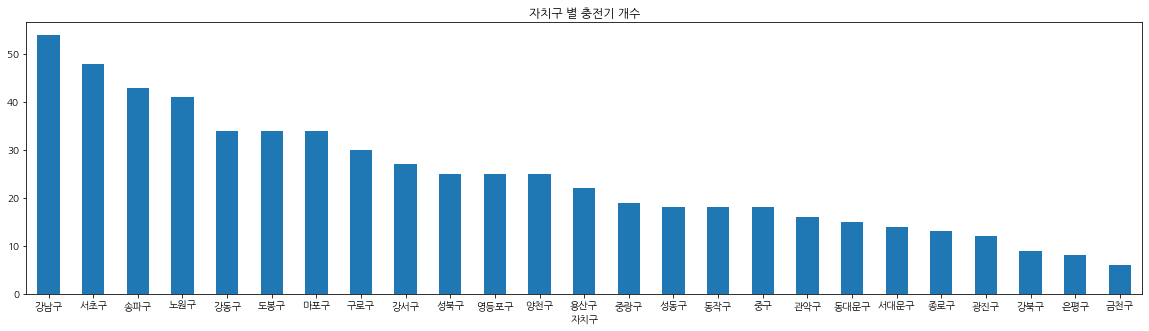

In [41]:
df.groupby('자치구')['충전소명'].nunique().sort_values(ascending=False).plot.bar(rot=0,figsize=(20,5), title = '자치구 별 충전기 개수');

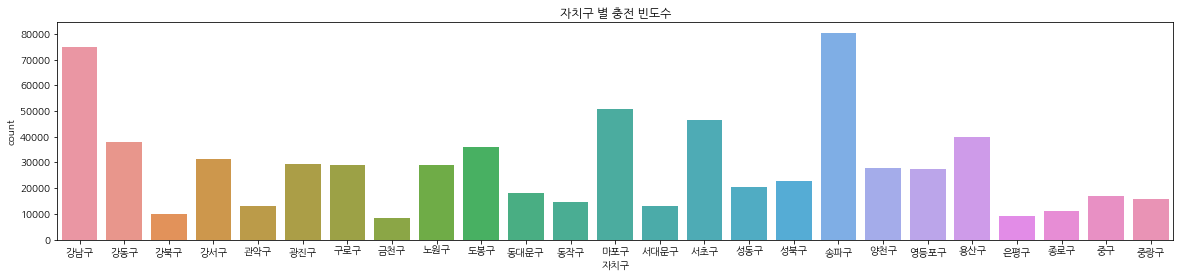

In [42]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("자치구"), x="자치구")
plt.title('자치구 별 충전 빈도수');

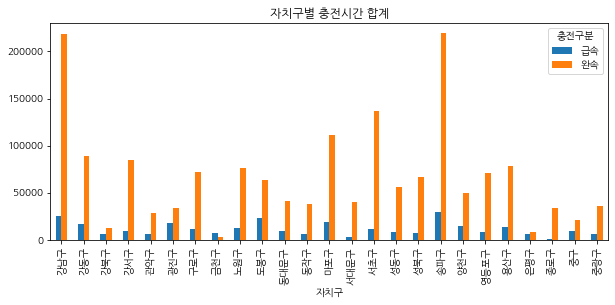

In [43]:
df.groupby(["자치구","충전구분"])["총충전시간"].sum().unstack().plot.bar(figsize=(10,4),title="자치구별 충전시간 합계");

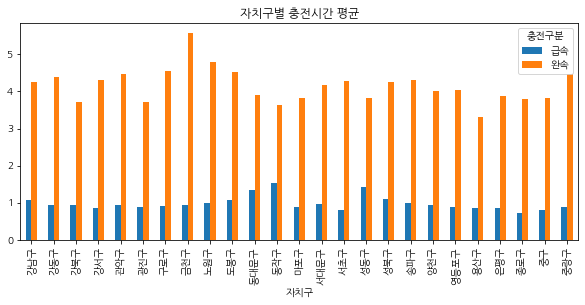

In [44]:
df.groupby(["자치구","충전구분"])["총충전시간"].mean().unstack().plot.bar(figsize=(10,4),title="자치구별 충전시간 평균");

## 충전소 별 충전 데이터
- 전체 충전소의 총 충전 시간 상자그림
- 전체 충전소의 총 충전량 상자그림
- 전체 충전소의 충전 빈도수 상자그림
- 이용이 가장 잦은 충전소 살펴보기

<AxesSubplot:title={'center':'전체 충전소의 총충전시간'}>

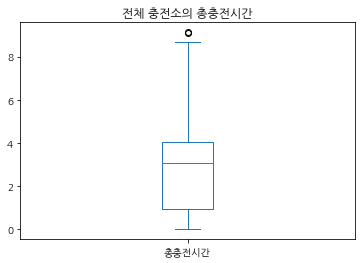

In [45]:
df.pivot_table(index="충전소명",values="총충전시간").plot.box(title="전체 충전소의 총충전시간")

<AxesSubplot:title={'center':'전체 충전소의 충전량'}>

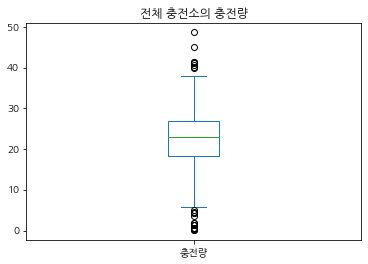

In [46]:
df.pivot_table(index="충전소명",values="충전량").plot.box(title="전체 충전소의 충전량")

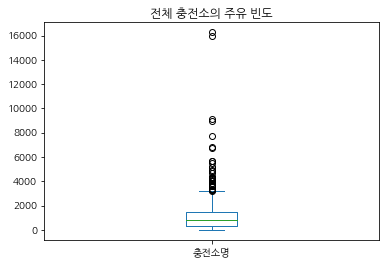

In [47]:
df["충전소명"].value_counts().plot.box(title="전체 충전소의 주유 빈도")

# 동적 시각화
px.box(df["충전소명"].value_counts(),notched=True, points="all", title="전체 충전소의 주유 빈도")

In [48]:
# 이용이 가장 잦은 충전소 살펴보기
df['충전소명'].value_counts()[:10]

용산역 아이파크몰      16266
상암월드컵경기장       15958
서울에너지공사 주차장     9161
뚝도충전소           8940
리센츠 아파트         7732
한국공항공사 서울       6855
강북성북지사(공용)      6708
강변테크노마트 주차장     5680
창동주공19단지        5654
레이크팰리스          5516
Name: 충전소명, dtype: int64

### 시간대별 충전 데이터
- 시간대에 따른 충전 빈도수 비교
- 자치구별 시간대에 따른 충전 빈도수 비교
- 요일별 시간대에 따른 충전 빈도수 비교
- 자치구별, 요일별 시간대에 따른 충전 빈도수 비교

In [49]:
time_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [50]:
time_count = pd.DataFrame(df.melt(id_vars = ['충전구분', '충전소명', '주소', '충전량', '충전시작시각', '충전종료시각', '자치구', '자치구코드',
       '급속충전기(대)', '완속충전기(대)', '경도', '위도', '요일', '총충전시간'], var_name = '시간대').groupby('시간대')['value'].sum()).reset_index()

In [51]:
time_count

,시간대,value
0,0,110000
1,1,95457
2,2,80643
3,3,66797
4,4,55537
5,5,47588
6,6,44408
7,7,45335
8,8,49226
9,9,54575


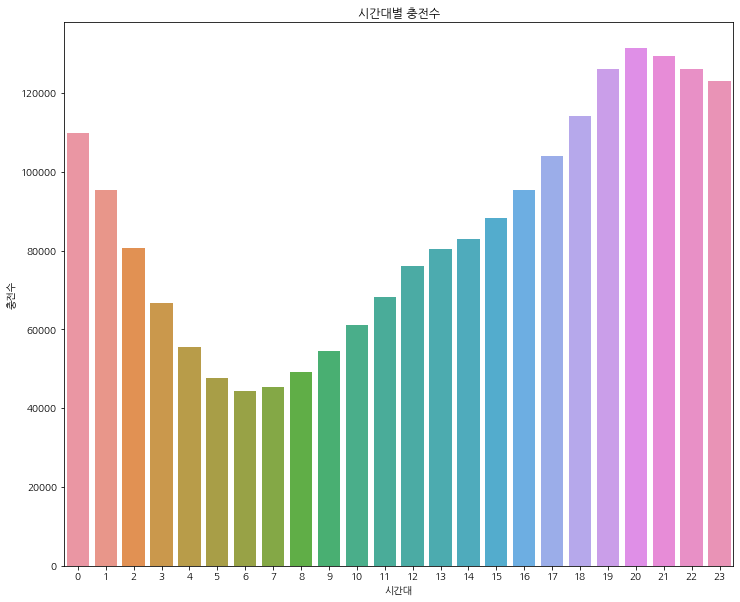

In [52]:
plt.figure(figsize = (12,10))
sns.barplot(data = time_count, x='시간대', y='value', ci = None, estimator = sum)
plt.ylabel('충전수')
plt.title('시간대별 충전수');

In [53]:
# 이렇게 할 수도 있겠다.
# pd.DataFrame(df[time_list].sum()).plot.bar(figsize = (12,10), rot = 0, xlabel = '시간대');


In [54]:
# 자치구 별 시간대에 따른 충전 빈도수 분석

df.pivot_table(index = '자치구', values = time_list, aggfunc = 'sum')
gu_time = pd.DataFrame(df.pivot_table(index = '자치구', values = time_list, aggfunc = 'sum').stack())
gu_time = gu_time.reset_index().rename(columns = {'level_1' : '시간대'})
gu_time

,자치구,시간대,0
0,강남구,0,13183
1,강남구,1,11204
2,강남구,2,9431
3,강남구,3,7747
4,강남구,4,6316
...,...,...,...
595,중랑구,19,2729
596,중랑구,20,3159
597,중랑구,21,3350
598,중랑구,22,3041


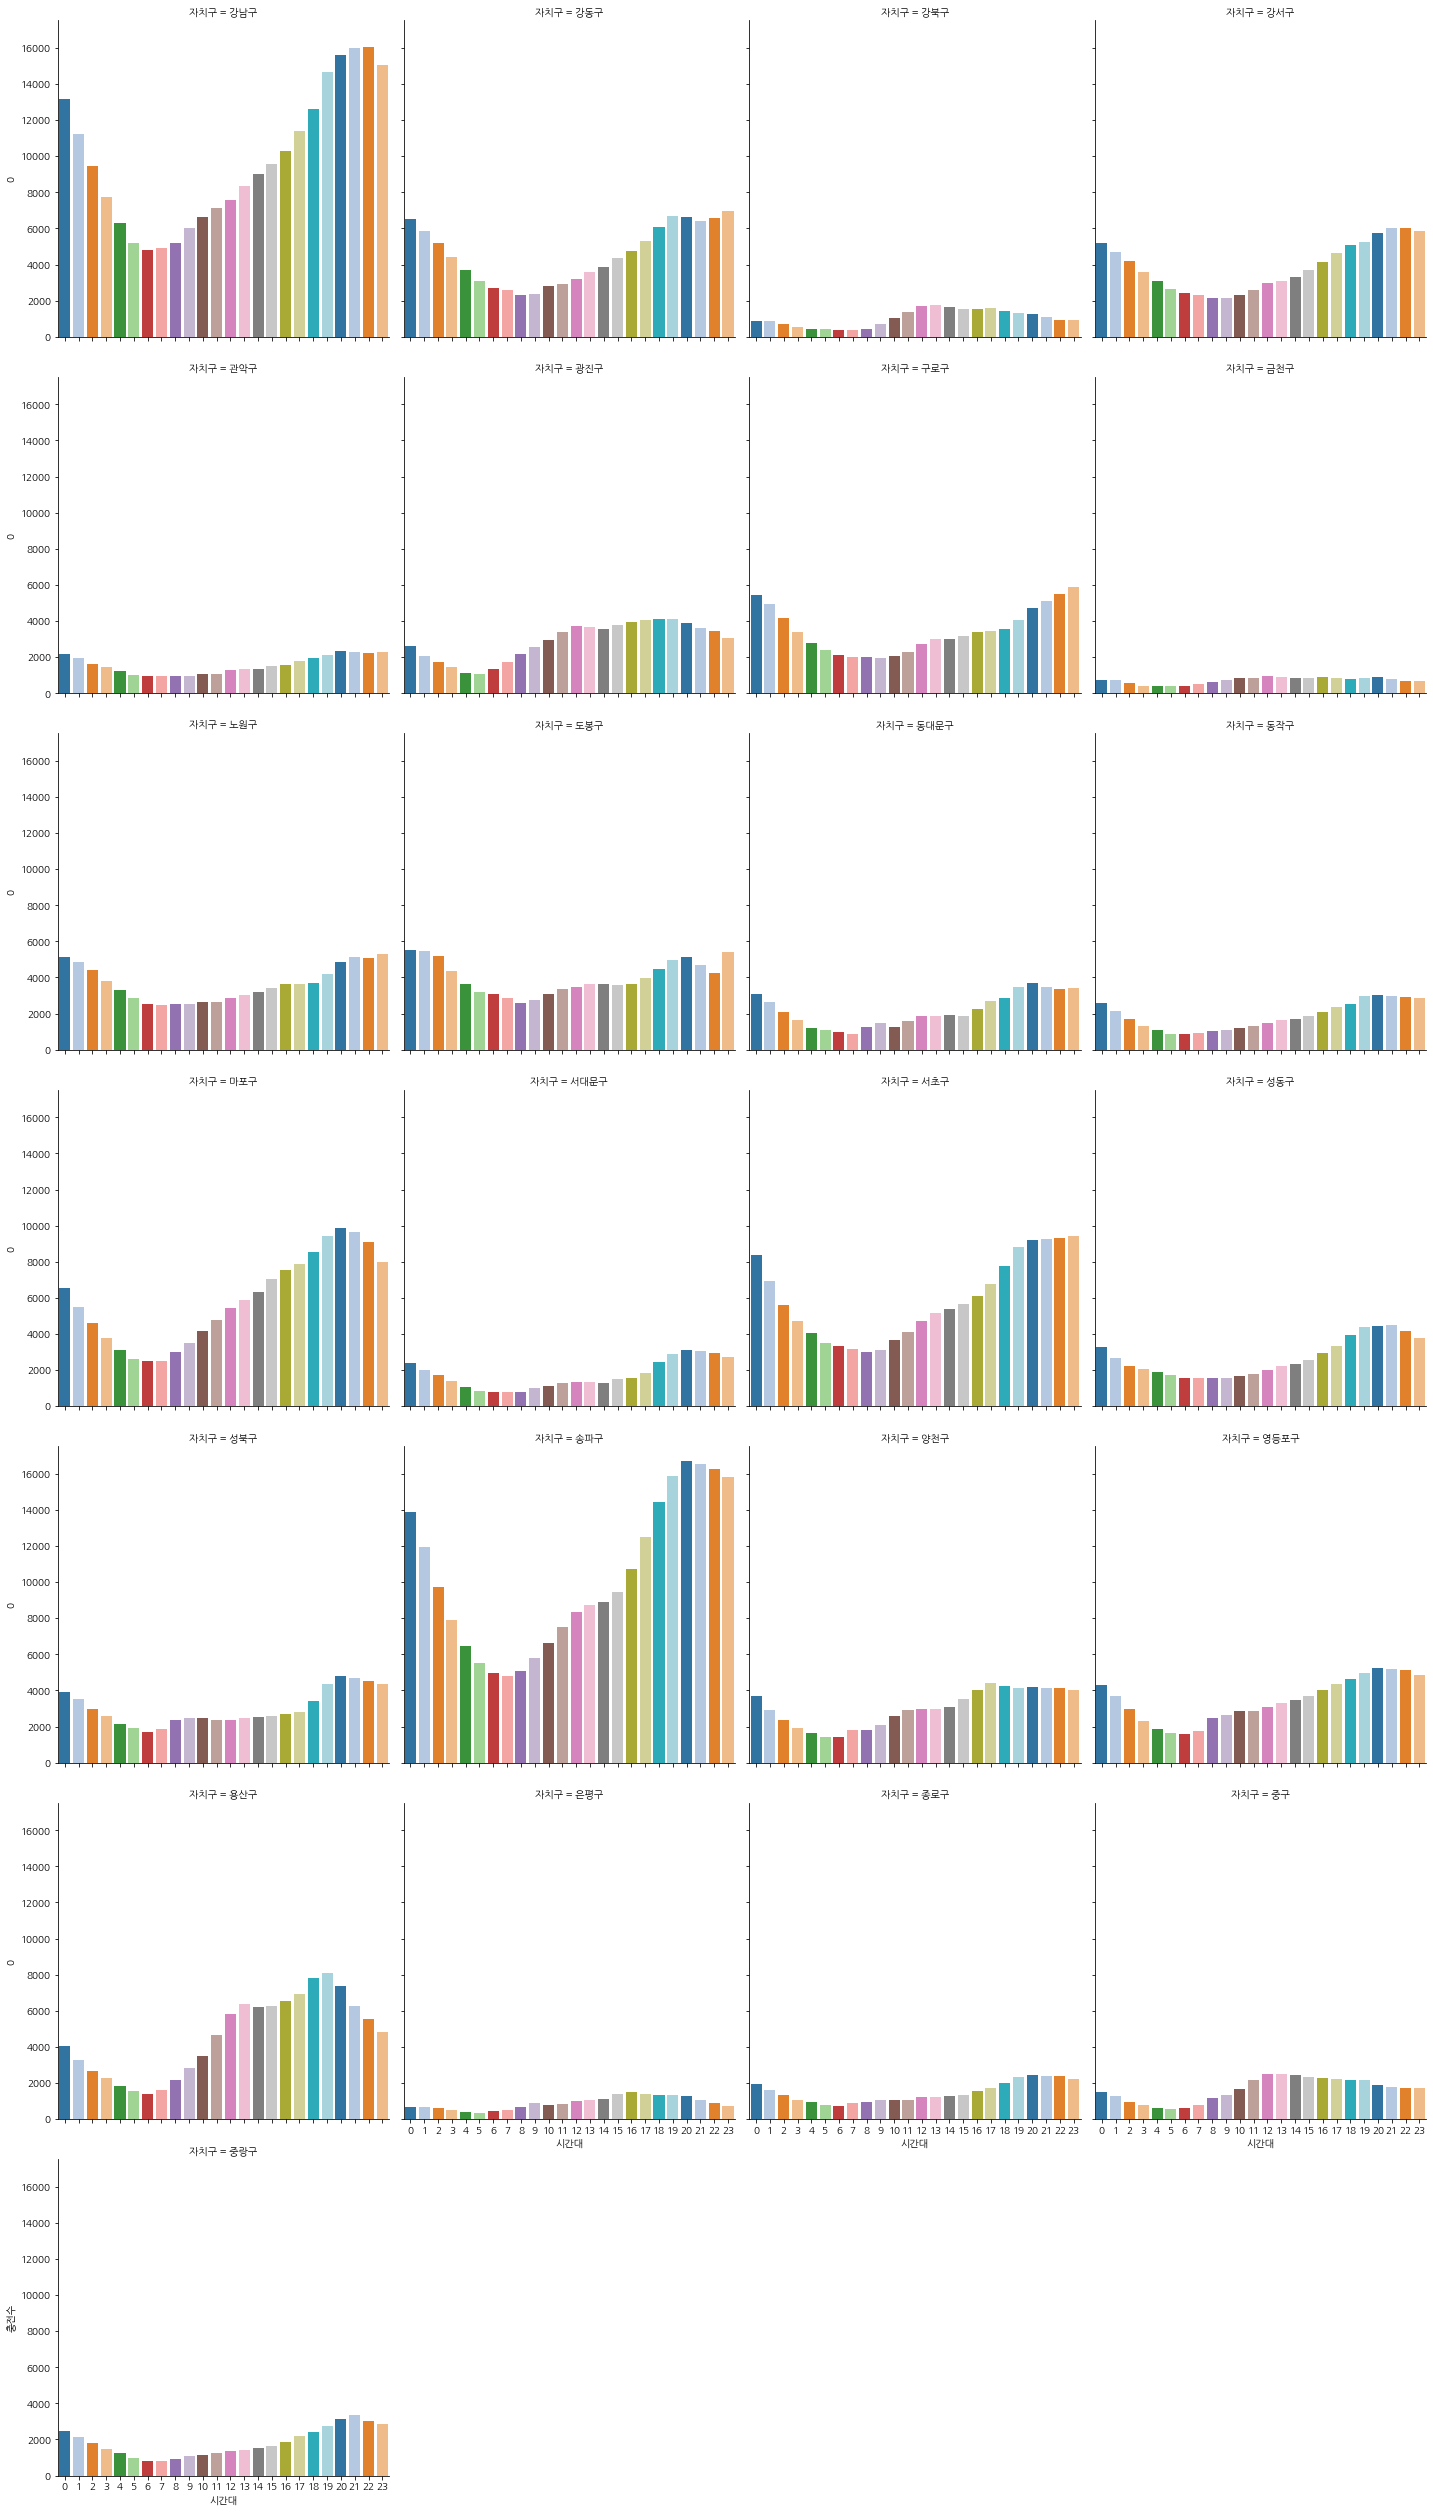

In [55]:
sns.catplot(data = gu_time, x='시간대', y=0, ci = None, kind = 'bar', col = '자치구', col_wrap = 4, palette = 'tab20')
plt.ylabel('충전수');

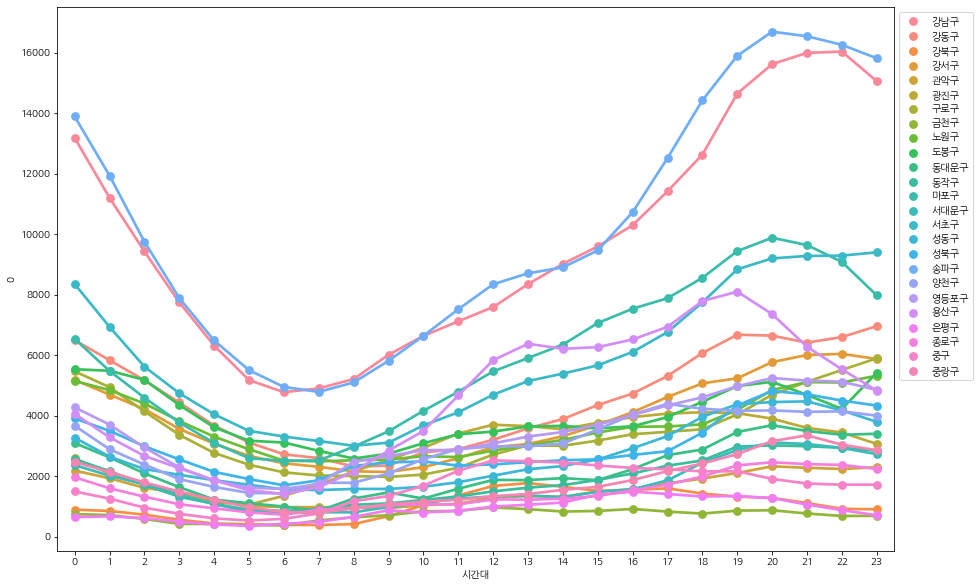

In [56]:
plt.figure(figsize = (15,10))
sns.pointplot(data= gu_time, x='시간대', y=0,hue = '자치구')
plt.legend(bbox_to_anchor = (1,1));

In [57]:
# 요일별 시간대별 충전 빈도수 분석

day_time = pd.DataFrame(pd.pivot_table(df, index = '요일', values = time_list, aggfunc = 'sum').stack()).reset_index().rename(columns = {'level_1' : '시간대'})
day_time

,요일,시간대,0
0,금,0,17330
1,금,1,15095
2,금,2,12715
3,금,3,10457
4,금,4,8603
...,...,...,...
163,화,19,18573
164,화,20,19556
165,화,21,19223
166,화,22,18689


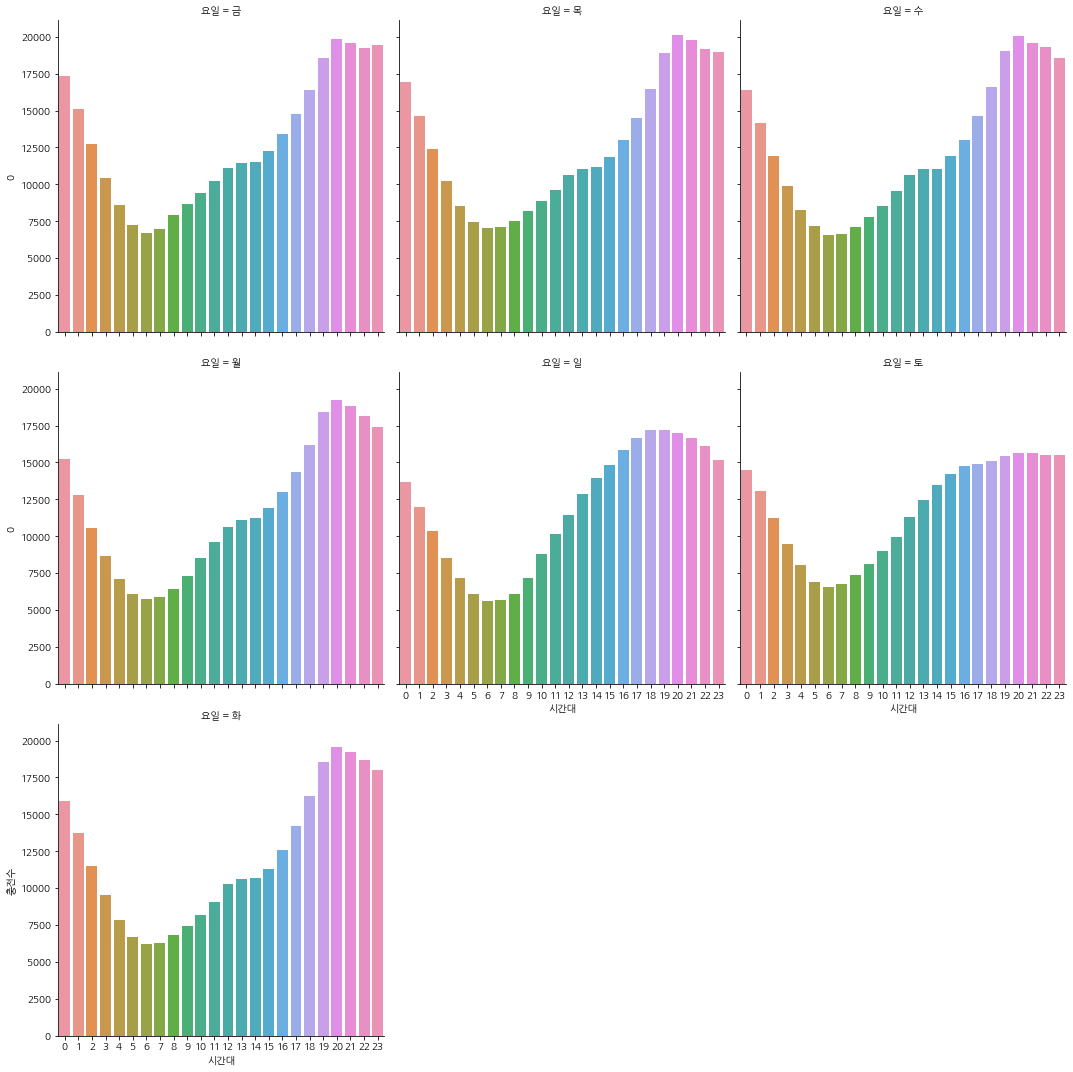

In [58]:
sns.catplot(data = day_time, x='시간대', y=0, ci = None, kind = 'bar', col = '요일', col_wrap = 3)
plt.ylabel('충전수');

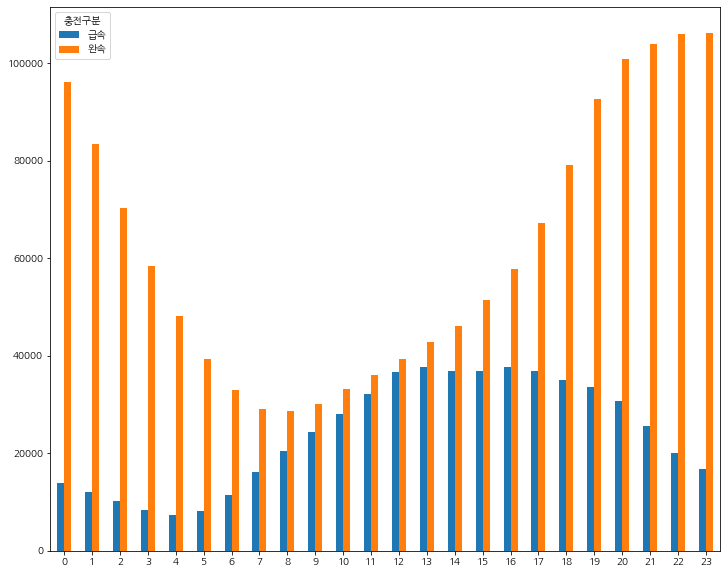

In [59]:
df.groupby('충전구분')[time_list].sum().T.plot.bar(figsize = (12,10), rot = 0);

In [60]:
df.groupby('충전소명')[['급속충전기(대)','완속충전기(대)']].mean().sum()

급속충전기(대)    576.0
완속충전기(대)    966.0
dtype: float64

## 주유소 VS 충전소

* 일반 주유소 개수와 전기차 충전소 개수 비교
- (일반 차량 : 주유소의 수)와 (전기차 : 충전소의 수)를 비교하여 충전소의 상대적 부족 여부를 파악한다.

### 서울시 주유소 현황

In [61]:
oil = pd.read_csv('data/20221020101743.csv')
oil

,자치구별(1),자치구별(2),판매소별(1),판매소별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,합계,소계,합계,소계,1005,955,920,853,816,774,751,721,697,679,637
1,합계,소계,합계,주유소,663,641,621,596,568,552,538,524,505,499,468
2,합계,소계,합계,용제판매소,66,56,51,37,39,33,30,26,24,24,19
3,합계,소계,합계,일반판매소,270,252,242,214,204,183,176,163,158,146,137
4,합계,소계,합계,항공유판매업,6,6,6,6,5,6,7,8,10,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,합계,강동구,합계,소계,39,38,36,34,28,27,26,25,23,22,19
126,합계,강동구,합계,주유소,25,25,25,24,20,20,19,18,16,16,14
127,합계,강동구,합계,용제판매소,1,1,1,1,-,-,-,-,-,-,-
128,합계,강동구,합계,일반판매소,13,12,10,9,8,7,7,7,7,6,5


In [62]:
oil = oil[~oil['자치구별(2)'].str.contains('소계')]
oil = oil[oil['판매소별(2)'].str.startswith('주유소')]
oil = oil.drop(["자치구별(1)", "판매소별(1)", "2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"], axis=1)

In [63]:
oil = oil.rename(columns = {"자치구별(2)" : "자치구", "판매소별(2)" : "판매소 유형", "2021" : "2021주유소 현황"})
oil

,자치구,판매소 유형,2021주유소 현황
6,종로구,주유소,9
11,중구,주유소,10
16,용산구,주유소,13
21,성동구,주유소,17
26,광진구,주유소,15
31,동대문구,주유소,19
36,중랑구,주유소,14
41,성북구,주유소,24
46,강북구,주유소,13
51,도봉구,주유소,18


### 서울시 자동차 등록 대수

In [64]:
cc=pd.read_csv("data/20221020162020.csv")

In [65]:
cc.head(5)

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,...,2021.14,2021.15,2021.16,2021.17,2021.18,2021.19,2021.20,2021.21,2021.22,2021.23
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,소계,소계,승용차,승용차,승용차,승용차,...,화물차,화물차,특수차,특수차,특수차,특수차,이륜차,이륜차,이륜차,이륜차
2,자치구별(1),자치구별(2),계,관용,자가용,영업용,계,관용,자가용,영업용,...,자가용,영업용,계,관용,자가용,영업용,계,관용,자가용,영업용
3,서울시,소계,3176743,12747,2958799,205197,2740044,4646,2609340,126058,...,263488,58976,9871,397,4387,5087,433020,4381,428639,-
4,서울시,종로구,50348,3872,44523,1953,41475,1736,38996,743,...,3806,889,231,99,67,65,13121,432,12689,-


In [66]:
cc = cc[~cc['자치구별(2)'].str.startswith("소계")]
cc = cc[~cc['자치구별(2)'].str.startswith("자치구별(2)")]
cc = cc.drop(["자치구별(1)", "2021.1", "2021.2" , "2021.3" , "2021.4", "2021.5", "2021.6", "2021.7", "2021.8", "2021.9", "2021.10", "2021.11", "2021.12", "2021.13", "2021.14", "2021.15", "2021.16", "2021.17", "2021.18", "2021.19", "2021.20", "2021.21", "2021.22", "2021.23"], axis=1)

In [67]:
cc = cc.rename(columns = {"자치구별(2)" : "자치구", "2021" : "2021등록된자동차"})
cc.sample(10)

,자치구,2021등록된자동차
22,영등포구,146095
12,강북구,75337
21,금천구,90169
9,동대문구,98466
28,강동구,152178
26,강남구,239643
14,노원구,152285
15,은평구,133175
27,송파구,246858
10,중랑구,114375


In [68]:
oil_cc = pd.merge(oil,cc, how="left")
oil_cc

,자치구,판매소 유형,2021주유소 현황,2021등록된자동차
0,종로구,주유소,9,50348
1,중구,주유소,10,61158
2,용산구,주유소,13,79740
3,성동구,주유소,17,107564
4,광진구,주유소,15,98371
5,동대문구,주유소,19,98466
6,중랑구,주유소,14,114375
7,성북구,주유소,24,121073
8,강북구,주유소,13,75337
9,도봉구,주유소,18,95631


In [69]:
oil_cc["2021주유소 현황"] = pd.to_numeric(oil_cc["2021주유소 현황"], downcast='unsigned')
oil_cc["2021등록된자동차"] = pd.to_numeric(oil_cc["2021등록된자동차"], downcast='unsigned')
oil_cc.dtypes

자치구           object
판매소 유형        object
2021주유소 현황     uint8
2021등록된자동차    uint32
dtype: object

#### 주유소 당 자동차

In [70]:
oil_cc["주유소 한개당 자동차"] = oil_cc["2021등록된자동차"]/oil_cc["2021주유소 현황"]
oil_cc["주유소 한개당 자동차"] = round(oil_cc["주유소 한개당 자동차"], 2)

In [71]:
oil_cc.sample(3)

,자치구,판매소 유형,2021주유소 현황,2021등록된자동차,주유소 한개당 자동차
9,도봉구,주유소,18,95631,5312.83
16,구로구,주유소,21,145874,6946.38
6,중랑구,주유소,14,114375,8169.64


<AxesSubplot:xlabel='자치구', ylabel='주유소 한개당 자동차'>

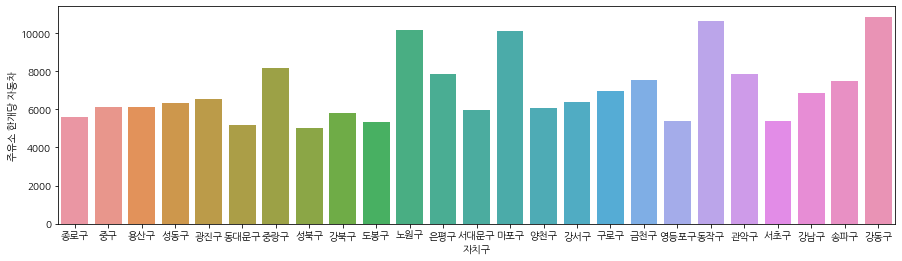

In [72]:
plt.figure(figsize=(15,4))
sns.barplot(data=oil_cc, x="자치구", y="주유소 한개당 자동차", ci=None)

## 전기차 대수 데이터

In [73]:
ee_car = pd.read_csv('data/seoul-any-gu-ev.csv', encoding = 'cp949')

In [74]:
ee_car

,연월별,시군구별,연료별,용도별,승 용,승 합,화 물,특 수,계
0,2017-12-31,종로구,전기,비사업용,73,0,2,0,75
1,2017-12-31,중 구,전기,비사업용,106,1,2,0,109
2,2017-12-31,중 구,전기,사업용,1,0,0,0,1
3,2017-12-31,용산구,전기,비사업용,67,0,0,0,67
4,2017-12-31,성동구,전기,비사업용,85,0,1,0,86
...,...,...,...,...,...,...,...,...,...
287,2022-07-31,강남구,전기,사업용,10241,3,125,0,10369
288,2022-07-31,송파구,전기,비사업용,1771,7,211,2,1991
289,2022-07-31,송파구,전기,사업용,306,1,242,0,549
290,2022-07-31,강동구,전기,비사업용,1036,1,145,0,1182


In [75]:
ee_car = ee_car[ee_car['연월별'] == '2021-12-31'][['시군구별','계']]

In [76]:
ee_car_mount = pd.DataFrame(ee_car.groupby('시군구별')['계'].sum()).reset_index()
ee_car_mount.loc[23,'시군구별'] = '중구'
ee_car_mount = ee_car_mount.rename(columns = {'시군구별' : '자치구'})

In [77]:
ee_station = df.groupby('자치구')['충전소명'].nunique().copy()
ee_station = pd.DataFrame(ee_station).reset_index()
ee_station = ee_station.rename(columns = {'충전소명' : '충전소수'})

In [78]:
ee_per = pd.merge(ee_car_mount,ee_station,on='자치구')

In [79]:
ee_per['충전소 당 전기차'] = ee_per['계'] / ee_per['충전소수']
ee_per

,자치구,계,충전소수,충전소 당 전기차
0,강남구,11432,54,211.703704
1,강동구,1273,34,37.441176
2,강북구,496,9,55.111111
3,강서구,1679,27,62.185185
4,관악구,730,16,45.625000
5,광진구,590,12,49.166667
6,구로구,3733,30,124.433333
7,금천구,530,6,88.333333
8,노원구,889,41,21.682927
9,도봉구,637,34,18.735294


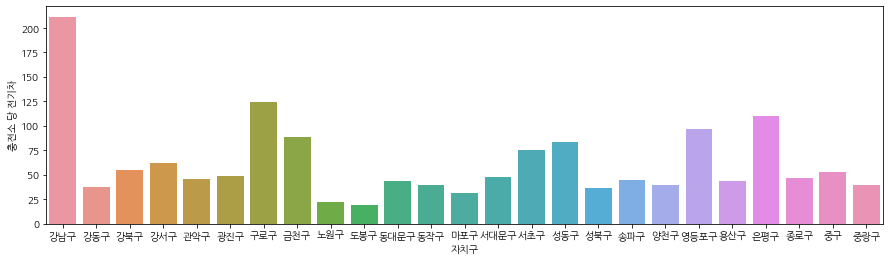

In [80]:
plt.figure(figsize=(15,4))
sns.barplot(data=ee_per, x="자치구", y="충전소 당 전기차", ci=None);

### 주유소와 충전소 비교

In [81]:
fuel_ee = pd.merge(oil_cc[['자치구','주유소 한개당 자동차']], ee_per[['자치구','충전소 당 전기차']], on ='자치구')

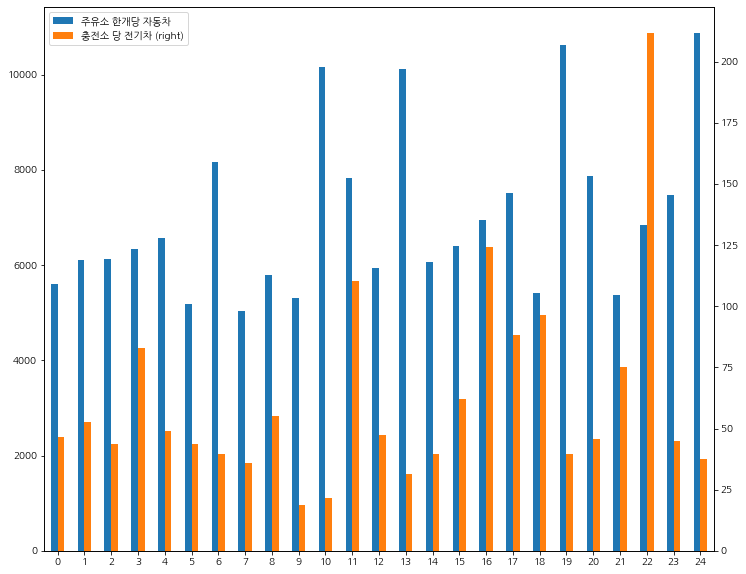

In [82]:
fuel_ee.plot.bar(figsize = (12,10), secondary_y ='충전소 당 전기차', rot = 0);